In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')

In [13]:
#loading data for active neurons --> right, middle, and left panels of Fig. 4
D1r=np.loadtxt('ActiveNodeDensityR1.txt')
D2r=np.loadtxt('ActiveNodeDensityR2.txt')
D3r=np.loadtxt('ActiveNodeDensityR3.txt')
D4r=np.loadtxt('ActiveNodeDensityR4.txt')
D5r=np.loadtxt('ActiveNodeDensityR5.txt')

D1m=np.loadtxt('ActiveNodeDensityM1.txt')
D2m=np.loadtxt('ActiveNodeDensityM2.txt')
D3m=np.loadtxt('ActiveNodeDensityM3.txt')
D4m=np.loadtxt('ActiveNodeDensityM4.txt')
D5m=np.loadtxt('ActiveNodeDensityM5.txt')

D1l=np.loadtxt('ActiveNodeDensityL1.txt')
D2l=np.loadtxt('ActiveNodeDensityL2.txt')
D3l=np.loadtxt('ActiveNodeDensityL3.txt')
D4l=np.loadtxt('ActiveNodeDensityL4.txt')
D5l=np.loadtxt('ActiveNodeDensityL5.txt')

# time
t=D1r[:,0]

# Rho
Rho1r=D1r[:,1]
Rho2r=D2r[:,1]
Rho3r=D3r[:,1]
Rho4r=D4r[:,1]
Rho5r=D5r[:,1]
RhoR=np.concatenate((Rho1r,Rho2r,Rho3r,Rho4r,Rho5r))

Rho1m=D1m[:,1]
Rho2m=D2m[:,1]
Rho3m=D3m[:,1]
Rho4m=D4m[:,1]
Rho5m=D5m[:,1]
RhoM=np.concatenate((Rho1m,Rho2m,Rho3m,Rho4m,Rho5m))

Rho1l=D1l[:,1]
Rho2l=D2l[:,1]
Rho3l=D3l[:,1]
Rho4l=D4l[:,1]
Rho5l=D5l[:,1]
RhoL=np.concatenate((Rho1l,Rho2l,Rho3l,Rho4l,Rho5l))

In [14]:
# Function for finding start and end points of the activity cycles
# Input: Rho
# Output: startpoints &  endpoints

def StartAndEndPoints(Rho):
    precision=0.05
    t=np.arange(0,len(Rho))
    tmax=max(t)
    threshold=min(Rho)
    flag=False
    i=0
    startlocs=[]
    endlocs=[]
    while i<(tmax-10):
        if ( Rho[i]-threshold <= precision ):
            i=i+1
            continue
        first=i
        if (Rho[i-1] < Rho[i] ):
            first=first-1
        startlocs.append(first)
        flag=True
        while(flag):
            i=i+1
            if ( Rho[i]-threshold <= precision ):
                flag=False
        endlocs.append(i)
        i=i+1;
        
    return(startlocs,endlocs)

In [15]:
# Function for calculating silences and bursts periods
# Input: startlocs and endlocs
# Output: silence_array and bursts_array

def SilenceBurstArray(startlocs,endlocs):
    silencemean=10  #choose it properly
    start=startlocs[0]
    index=np.arange(0,len(endlocs)-1)
    silence_array=[]
    bursts_array=[]
    for i in index:
        s = startlocs[i+1] - endlocs[i]
        if (s>silencemean):
            silence_array.append(s)
            b = endlocs[i] - start
            bursts_array.append(b)
            start = startlocs[i+1]
    return(silence_array,bursts_array)

In [16]:
# Data for hist plots
startlocsR , endlocsR = StartAndEndPoints(RhoR)
silence_arrayR , bursts_arrayR = SilenceBurstArray(startlocsR,endlocsR)

startlocsM , endlocsM = StartAndEndPoints(RhoM)
silence_arrayM , bursts_arrayM = SilenceBurstArray(startlocsM,endlocsM)

startlocsL , endlocsL = StartAndEndPoints(RhoL)
silence_arrayL , bursts_arrayL = SilenceBurstArray(startlocsL,endlocsL)


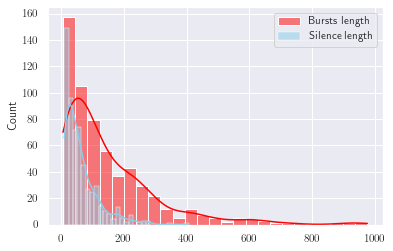

In [17]:
import seaborn as sns

sns.set(style="darkgrid")
sns.histplot(data=bursts_arrayR, kde=True, label="Bursts length", color="red")
sns.histplot(data=silence_arrayR, kde=True, label="Silence length", color="skyblue")
plt.legend() 

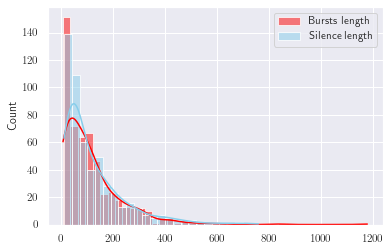

In [18]:
sns.set(style="darkgrid")
sns.histplot(data=bursts_arrayM, kde=True, label="Bursts length", color="red")
sns.histplot(data=silence_arrayM, kde=True, label="Silence length", color="skyblue")
plt.legend() 

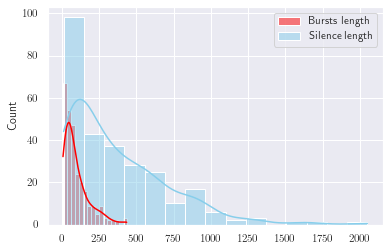

In [19]:
sns.set(style="darkgrid")
sns.histplot(data=bursts_arrayL, kde=True, label="Bursts length", color="red")
sns.histplot(data=silence_arrayL, kde=True, label="Silence length", color="skyblue")
plt.legend() 